# Mort, the TinkerToy Man
An excercise in engineering.


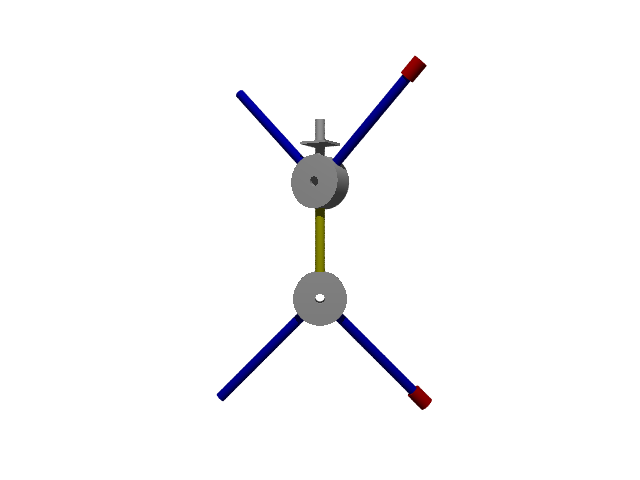

In [3]:
## Our friend Mort, the headless TinkerToy guy.
## (c) 1996, 1999, 2014 duane a. bailey
##
# By placing the mouse to the right of the command below, and hitting enter
# you can get "default-camera" to tell you the types of messages it will accept.
from ambrosia import *

# A cylinder that is 1" tall and 1" in diameter
unit_cylinder = Group().add(cylinder,scale(.01))
unit_cube = Group().add(cube,scale(0.01))

# yellow stick is 2.25" long, and 1/4" diameter
yellow_stick = Group().add(unit_cylinder,scale(0.25,2.5,0.25),yellowPlaster)

# blue stick is longer, but just as wide
blue_stick = Group().add(unit_cylinder,scale(0.25,3.333,0.25),bluePlaster)

# orange (red) caps are 3/8" in diameter, 1/2" long
orange_cap = Group().add(unit_cylinder,scale(0.375,0.5,0.375),redPlaster)

# the double-male connector piece
connector = Group().add(unit_cylinder,scale(0.25,1.25,0.25))
connector.add(unit_cube,scale(0.75,0.0625,0.75))
connector.material(whitePlaster)
connector.handle("top",(0,0.625,0))

# astonishing engineering: the octagon connector
wheel = Difference()
wheel.add(unit_cylinder,scale(1.375,0.625,1.375)*xRot(-90),whitePlaster)
wheel.add(unit_cylinder,scale(0.25,3,0.25)*xRot(-90),whitePlaster)

# Now, put the pieces together:
# First, a blue piece with a cap.
#    1. blue stick is added
#    2. add on orange cap 1.6666 inches below origin
capped_blue_stick = Group().add(blue_stick).add(orange_cap,translate(0,-1.6666,0))

# Second, build the bottom & feet
bottom = Group().add(wheel).add(blue_stick,translate(0,-2,0)*zRot(-45))
bottom.add(capped_blue_stick,translate(0,-2,0)*zRot(45))

# headless shoulders
top = Group().add(bottom,xRot(180)).add(connector,translate(0,1,0))
# headless torso
body = Group().add(top,yRot(30)*translate(0,1.5,0))
body.add(yellow_stick)
body.add(bottom,translate(0,-1.5,0))
body.scale(20)
mort = body

# Lights, camera, action
scene = Group().add(bulb,translate(0,300,-300))
camera = Camera().subject(scene)
image = camera.getImage()

scene.add(body, scale(1.5))
camera.shoot()
